# <html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">
 
</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">CA1-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

   <div>    
       <h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou-sid:810100084 </h1>
       <h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzaneh-sid:810100194 </h1>

</div>
   

</html>











## Task Overview
This assignment will introduce and implement statistical analysis tools that can be beneficial for future research and projects. By familiarizing ourselves with these tools, we can enhance our analytical capabilities and leverage statistical methods effectively in various contexts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, expon, f, norm
import random

## Monte Carlo Simulation

Monte Carlo simulation is a powerful computational method used to estimate the likelihood of various outcomes by running numerous random trials or sampling from probability distributions. The technique draws its name from the renowned Monte Carlo Casino in Monaco, where games of chance rely on randomness.

Here are some key aspects of Monte Carlo simulation:

1. **Random Sampling**: Monte Carlo simulation involves generating a large number of random samples from known probability distributions or using random processes to represent uncertainty.

2. **Complex Systems**: It is commonly employed to analyze complex systems that involve stochastic components, where finding deterministic solutions analytically may be challenging or infeasible.

3. **Numerical Integration**: Monte Carlo methods can be utilized for numerical integration to estimate the value of integrals that are difficult to solve analytically. This is done by randomly sampling points within the integration domain.

4. **Risk Assessment**: The technique is widely used in risk assessment and decision-making processes, particularly in fields such as finance and engineering, where uncertainty is a significant factor. By simulating various scenarios, it helps in assessing the likelihood of different outcomes and making informed decisions.

5. **Simulation Accuracy**: Generally, the accuracy of Monte Carlo simulations improves as the number of samples or trials increases. Even with a relatively small sample size, these simulations can still provide valuable insights into the behavior of complex systems.

6. **Applications**: Monte Carlo simulation finds diverse applications, including option pricing in finance, solving optimization problems, simulating physical phenomena like particle physics, applications in computational biology, and assessing the reliability of engineering systems.

Monte Carlo simulation is a versatile tool that leverages randomness to model complex systems, analyze uncertainties, and make data-driven decisions across various domains.

### Pi Calculation


In [2]:
num_points = [100, 1000, 10000, 100000 , 1000000]  

def estimate_pi(num_points):
    points_inside_circle = 0
    # Generate random points in the square [-1,1] x [-1,1]
    points = np.random.uniform(-1, 1, size=(2, num_points))
    distances = np.linalg.norm(points, axis=0)
    points_inside_circle = np.sum(distances <= 1)
    pi_estimate = 4 * points_inside_circle / num_points
    return pi_estimate


In [3]:
num_simulations = 10
average_pis = []
for num_point in num_points:
    pi_estimates = []
    for _ in range(num_simulations):
        pi_estimate = estimate_pi(num_point)
        pi_estimates.append(pi_estimate)
    average_pi_estimate = sum(pi_estimates) / len(pi_estimates)
    average_pis.append(average_pi_estimate)
    print(f"Number of points: {num_point}, Estimated Pi value: {average_pi_estimate: .4f}")

Number of points: 100, Estimated Pi value:  3.1520
Number of points: 1000, Estimated Pi value:  3.1520
Number of points: 10000, Estimated Pi value:  3.1423
Number of points: 100000, Estimated Pi value:  3.1406
Number of points: 1000000, Estimated Pi value:  3.1425


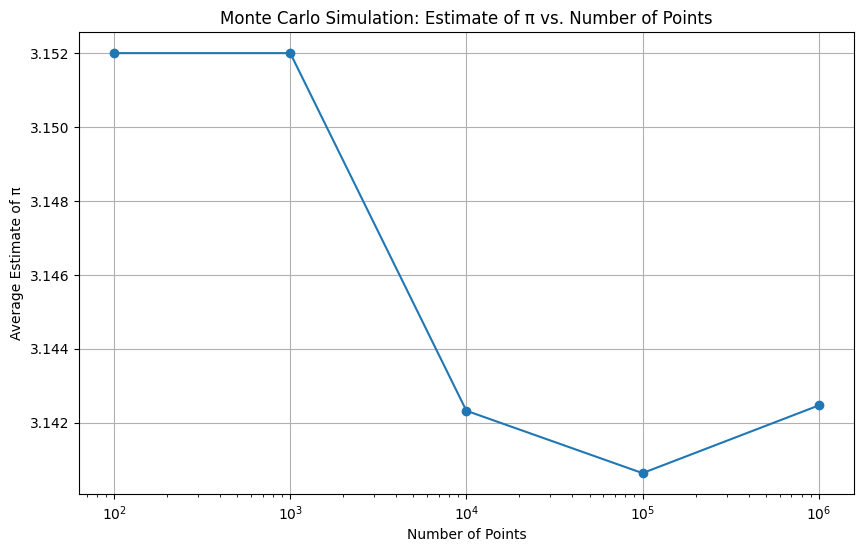

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(num_points, average_pis, marker="o")
plt.xscale("log")
plt.xlabel("Number of Points")
plt.ylabel("Average Estimate of π")
plt.title("Monte Carlo Simulation: Estimate of π vs. Number of Points")
plt.grid(True)
plt.show()

Indeed, as the number of points used in a Monte Carlo simulation to estimate the value of Pi increases, the accuracy of the estimator improves, and it converges towards the actual value of Pi. This is because with a larger number of points, the random sampling better approximates the true underlying distribution, resulting in a more precise estimation of Pi. In general, increasing the sample size or number of trials in a Monte Carlo simulation leads to a more reliable and accurate estimation of the target value.

### Mensch Game

In [5]:
def play_turn():
    return random.randint(1, 6)  

In [6]:
BOARD_SIZE = 40
def play_game():
    player_positions = [0, 0, 0, 0] 
    while max(player_positions) < BOARD_SIZE:  
        for player in range(4):  
            player_positions[player] += play_turn()
    winning_player = player_positions.index(max(player_positions)) 
    return winning_player


In [7]:
num_simulations = 100000
win_counts = [0, 0, 0, 0]
for _ in range(num_simulations):
    winner = play_game()
    win_counts[winner] += 1

In [8]:
total_wins = sum(win_counts)
win_probabilities = [count / total_wins for count in win_counts]
for player, prob in enumerate(win_probabilities):
    print(f"Player {player+1}: Probability of winning = {prob:.4f}")

Player 1: Probability of winning = 0.2644
Player 2: Probability of winning = 0.2548
Player 3: Probability of winning = 0.2471
Player 4: Probability of winning = 0.2337


The probability analysis reveals a closely contested competition among the players, with Player 1 holding a slight edge over Player 2, while Players 3 and 4 are closely trailing behind. This suggests a relatively equitable distribution of winning probabilities among the players in the simplified Mensch game, where each player has an almost equal chance of winning.

## Central Limit Theorem(CLT)

In [9]:
sample_sizes = [10, 50, 100, 500 , 1000]
num_samples = 1000
distributions = ['normal', 'uniform', 'exponential', 'chi_square', 'mini_chi_square', 'mini_exponential']



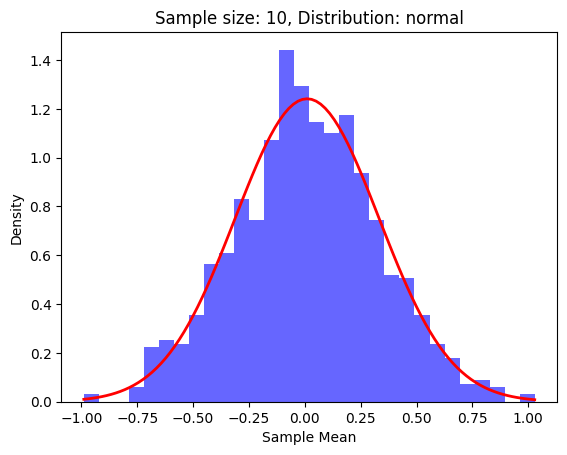

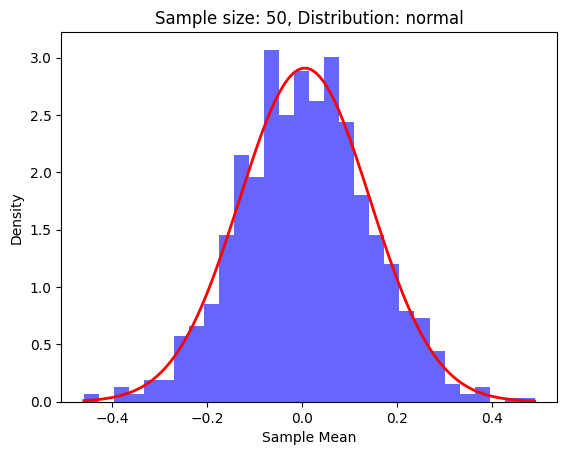

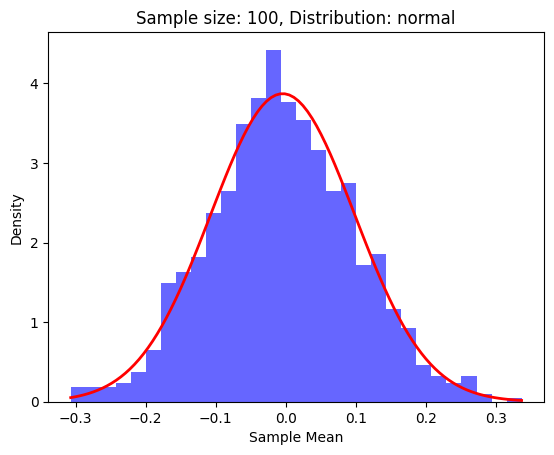

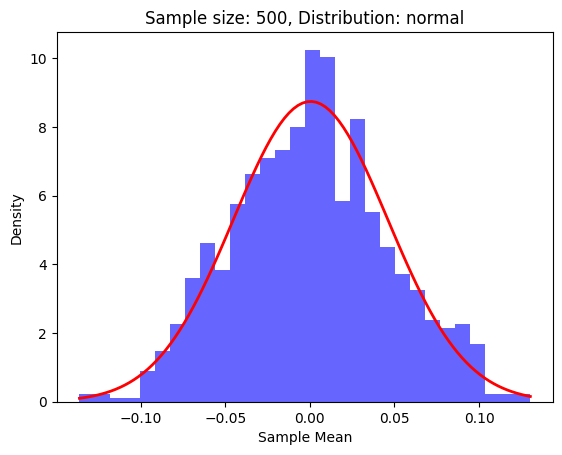

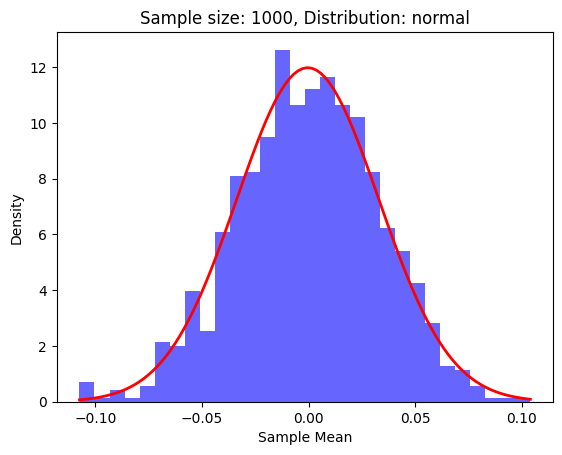

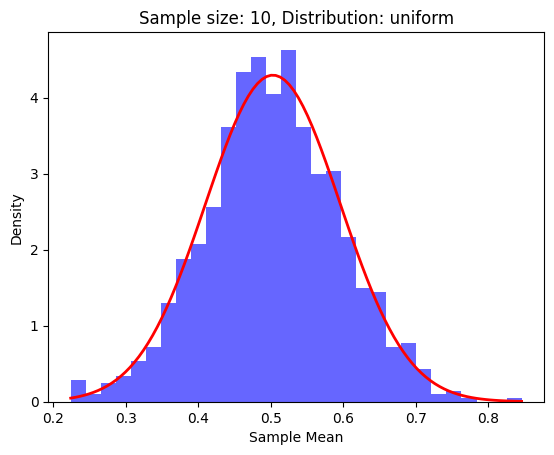

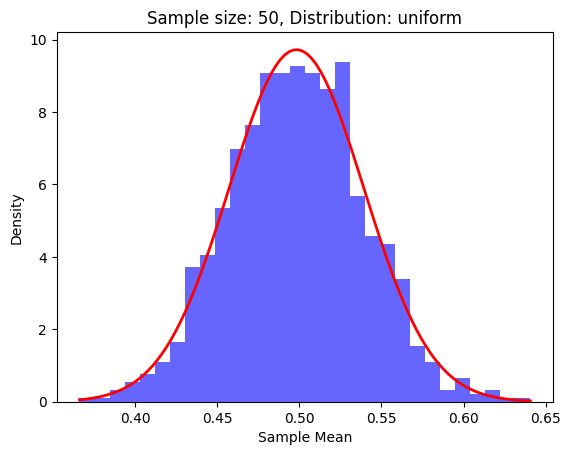

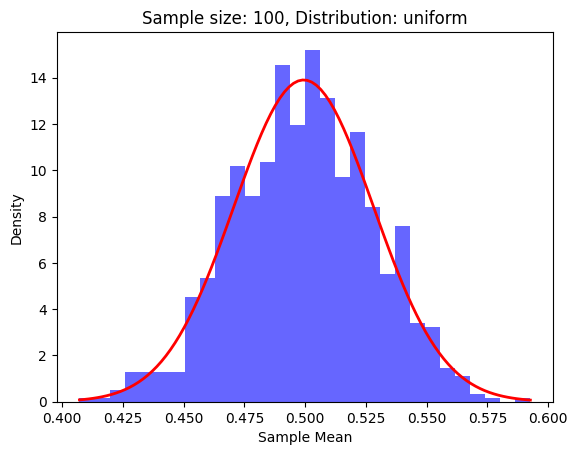

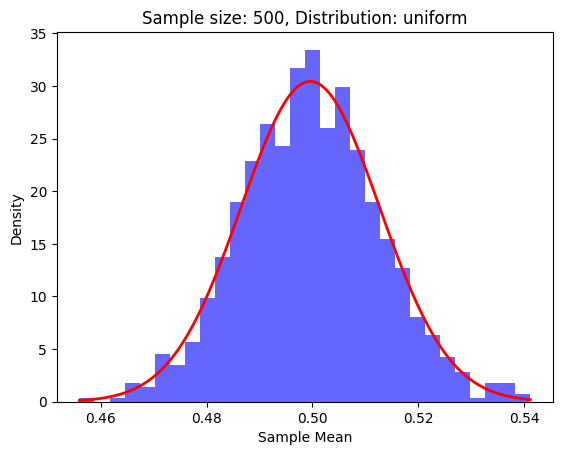

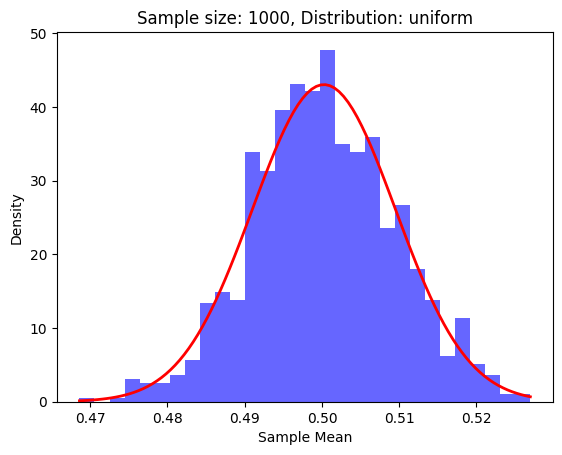

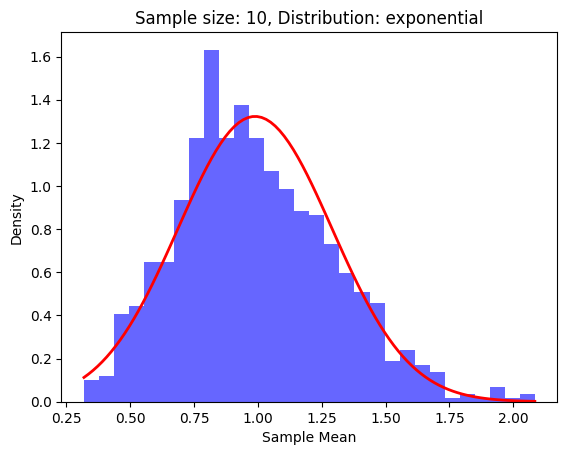

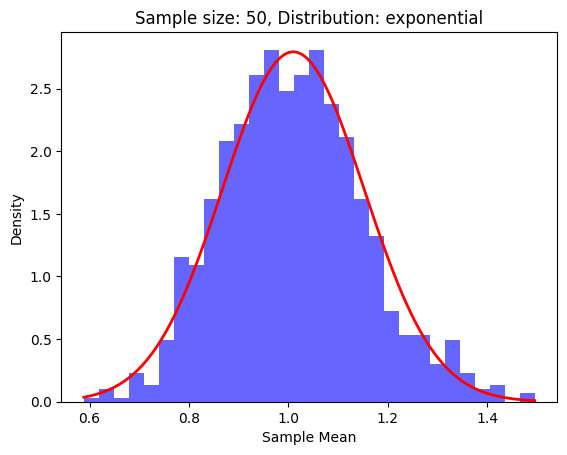

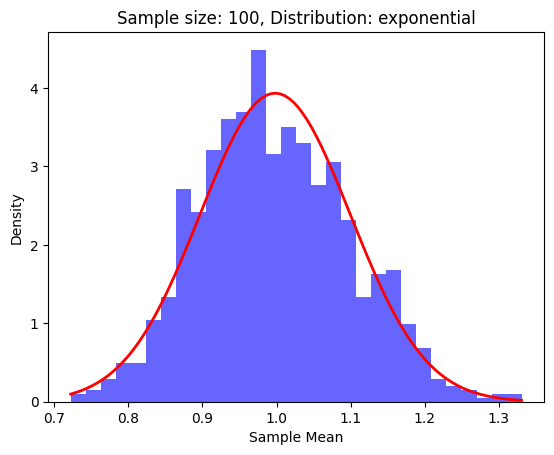

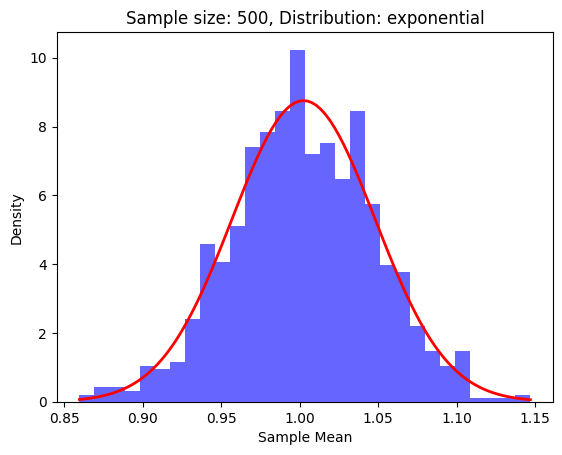

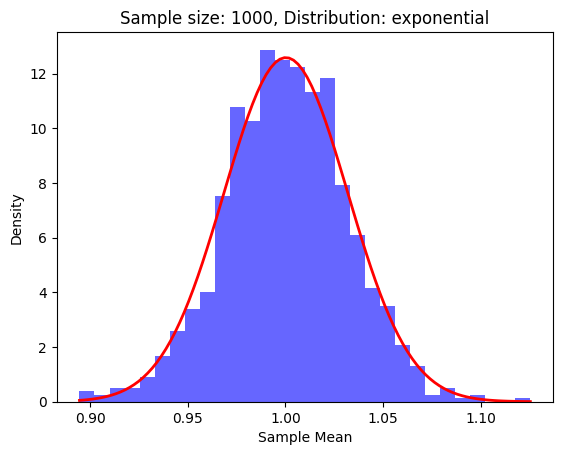

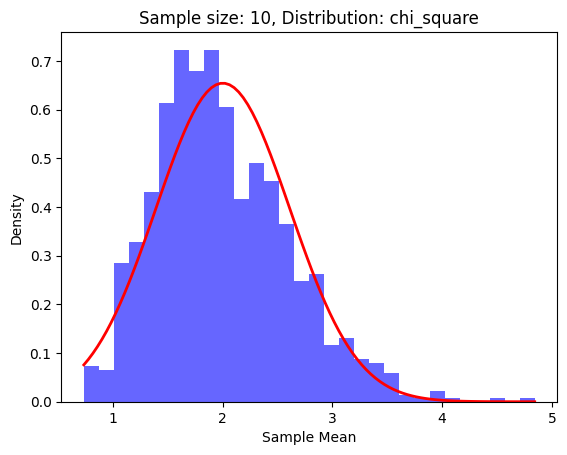

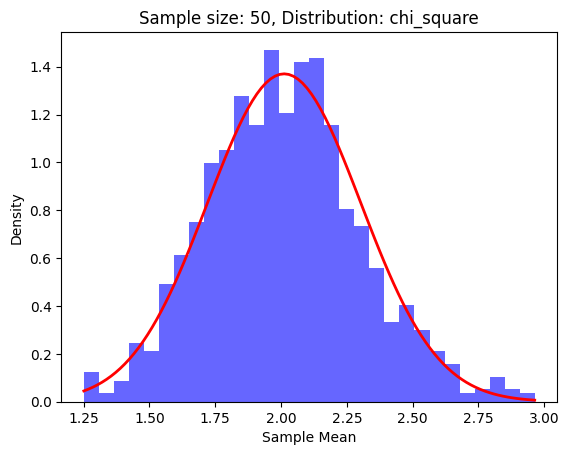

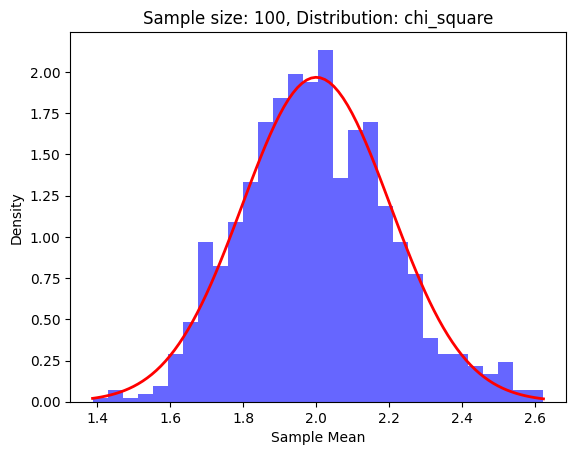

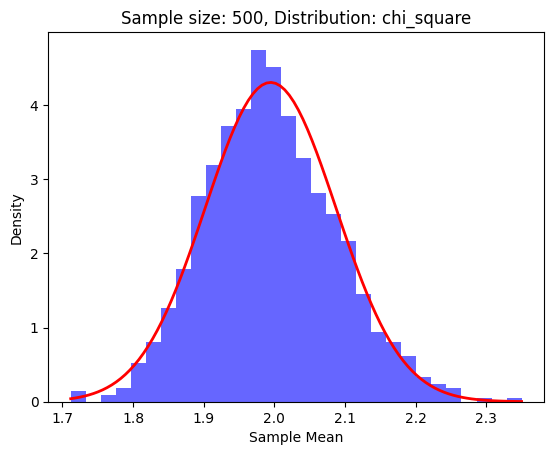

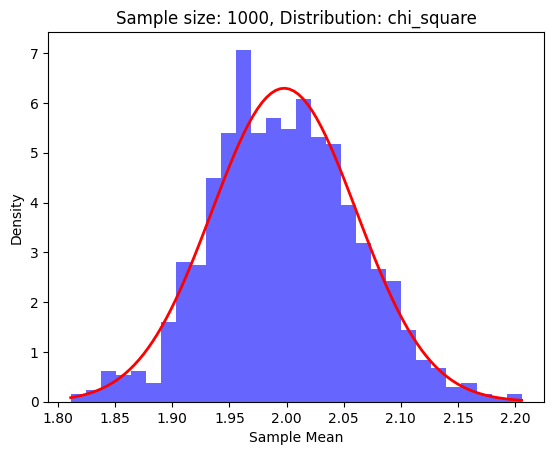

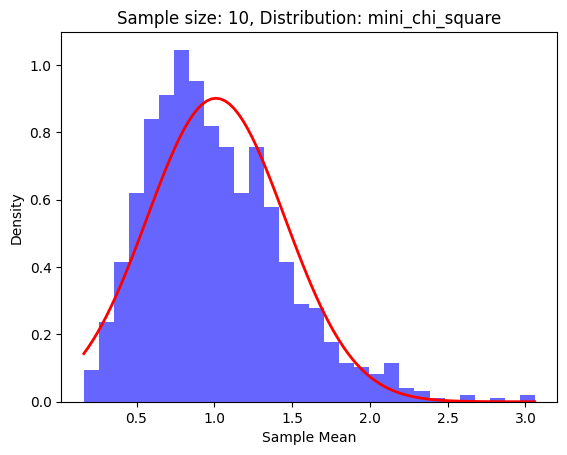

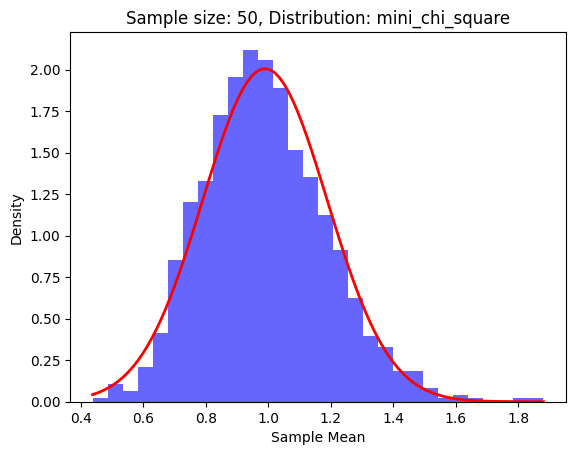

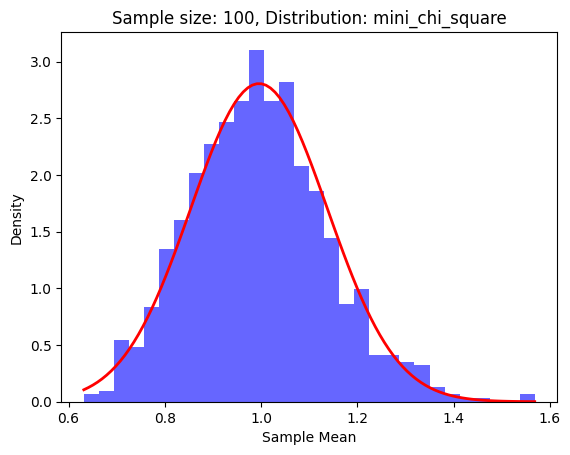

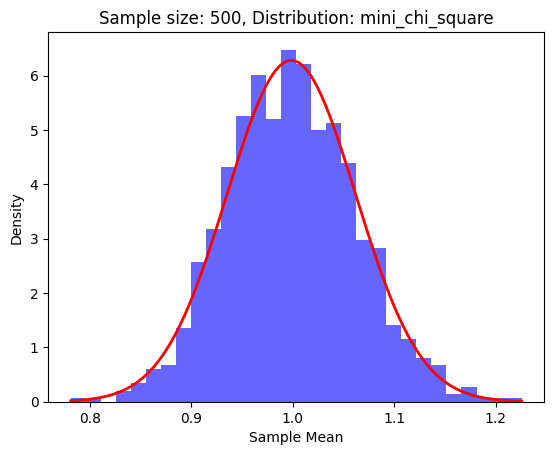

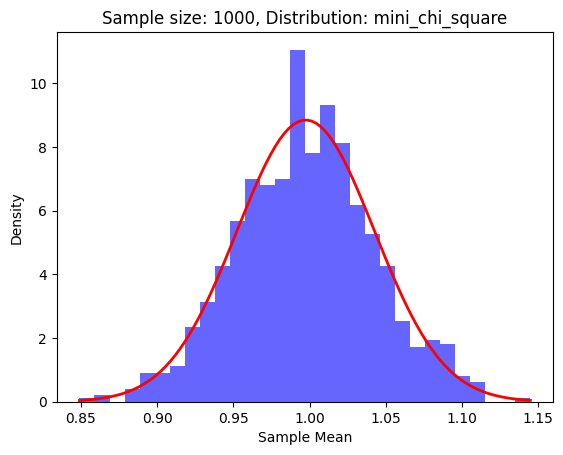

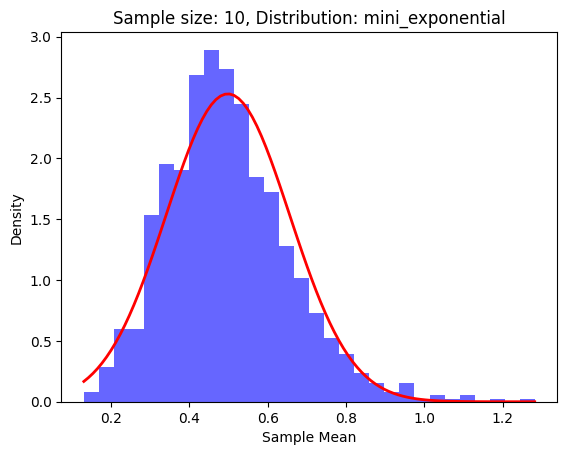

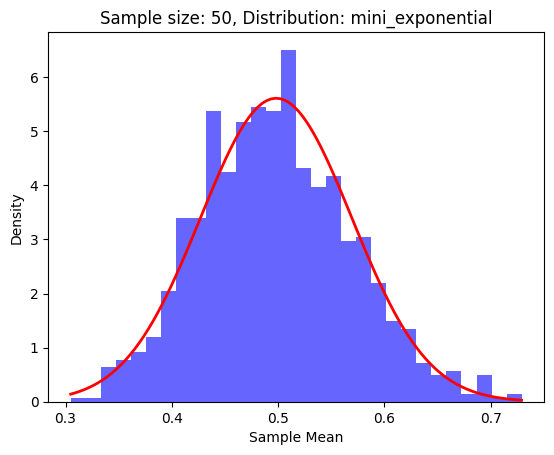

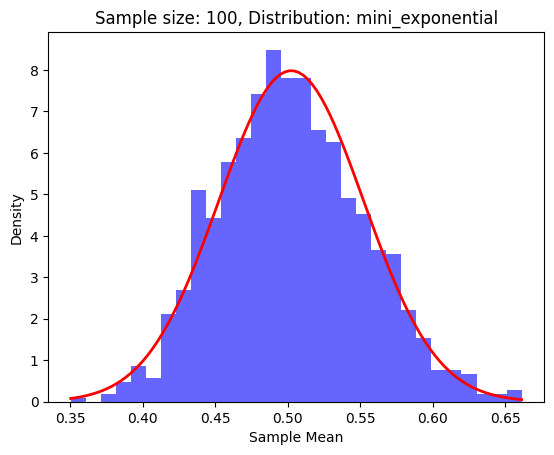

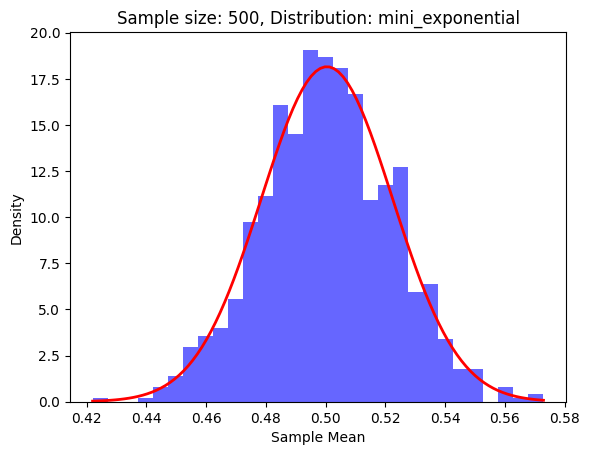

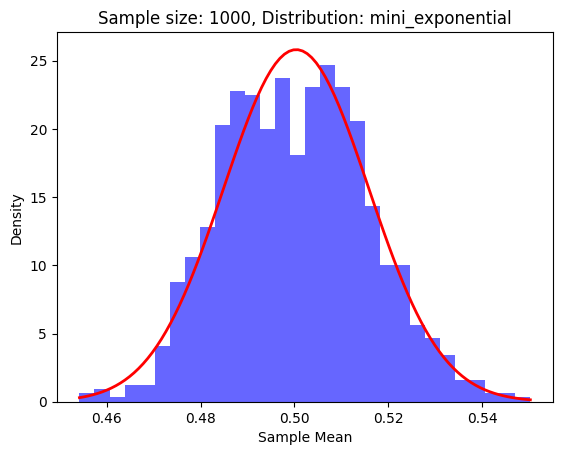

In [10]:
for distribution in distributions:
    for sample_size in sample_sizes:
        sample_means = []
        is_f = 0
        for _ in range(num_samples):
            if distribution == 'normal':
                data = np.random.normal(loc=0, scale=1, size=sample_size)
            elif distribution == 'uniform':
                data = np.random.uniform(low=0, high=1, size=sample_size)
            elif distribution == 'exponential':
                data = np.random.exponential(scale=1, size=sample_size)
            elif distribution == 'chi_square':
                data = np.random.chisquare(df=2, size=sample_size)
            elif distribution == 'mini_chi_square':
                data = np.random.chisquare(df=1, size=sample_size)
            elif distribution == 'mini_exponential':
                data = np.random.exponential(scale=0.5, size=sample_size)

            
            sample_means.append(np.mean(data))

        plt.figure()
        if (is_f != 1):
            plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b')
        else:
            plt.hist(sample_means, bins=1000, density=True, alpha=0.6, color='b')

        mu = np.mean(sample_means)
        sigma = np.std(sample_means)
        x = np.linspace(min(sample_means), max(sample_means), 100)

        if distribution in ['normal', 'uniform', 'exponential']:
            plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)
        elif distribution == 'chi_square':
            plt.plot(x, norm.pdf(x, loc=mu, scale=sigma), 'r', linewidth=2)
        elif distribution == 'mini_chi_square':
            plt.plot(x, norm.pdf(x,  loc=mu, scale=sigma), 'r', linewidth=2)
        elif distribution == 'mini_exponential':
            plt.plot(x, norm.pdf(x, loc=mu, scale=sigma), 'r', linewidth=2)
        
        plt.title(f'Sample size: {sample_size}, Distribution: {distribution}')
        plt.xlabel('Sample Mean')
        plt.ylabel('Density')
        plt.show()

The Central Limit Theorem states that the distribution of the sample means of a random variable will be approximately normally distributed, regardless of the original distribution of the variable, as the sample size approaches infinity. This is a powerful statistical principle that allows us to infer properties of the population from the sample.

When we take random samples from a population and calculate the means of those samples, the distribution of those sample means will become increasingly close to a normal distribution as the sample size increases. This means that even if the original population distribution was not normal, the distribution of the sample means will tend towards normality with larger sample sizes.

In practice, this means that when we plot the histogram of sample means for different sample sizes, we should see a shift towards a bell-shaped normal distribution as the sample size grows. This is because larger sample sizes provide more information about the population, leading to more precise estimates of the true mean.

Observing how the distribution of sample means changes with increasing sample sizes can provide valuable insights into how sample size affects the precision of our estimates and the reliability of our inferences. By comparing the distribution of sample means for different sample sizes, we can see how the Central Limit Theorem holds true in practice and how it influences the behavior of sample statistics.

## Hypothesis testing

In [11]:
import numpy as np
from scipy import stats
import pandas as pd


def simulate_coin_flips(n, p_heads):
    return np.random.binomial(1, p_heads, n)

In [12]:
def hypothesis_testing(n, p_heads):
    
    flips = simulate_coin_flips(n, p_heads)
    heads = np.sum(flips)
    p_hat = heads / n
    p_null = 0.5
    se = np.sqrt(p_null * (1 - p_null) / n)
    z = (p_hat - p_null) / se
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))
    confidence_interval = stats.norm.interval(0.95, loc=p_hat, scale=se)
    
    return heads, p_hat, z, p_value, confidence_interval

In [13]:
# Perform hypothesis testing for different sample sizes
sample_sizes = [30, 100, 1000]
results = {}

for n in sample_sizes:
    results[n] = hypothesis_testing(n, 0.55)

# Output the results
for n, (heads, p_hat, z, p_value, confidence_interval) in results.items():
    print(f"Sample size: {n}")
    print(f"Heads count: {heads}")
    print(f"Sample proportion: {p_hat:.2f}")
    print(f"Z-score: {z:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"95% Confidence Interval: {confidence_interval}")
    print(f"Decision regarding null hypothesis: {'Reject' if p_value < 0.05 or (confidence_interval[0] < 0.5 < confidence_interval[1]) else 'Fail to reject'}")


Sample size: 30
Heads count: 19
Sample proportion: 0.63
Z-score: 1.46
P-value: 0.1441
95% Confidence Interval: (0.45441391896161765, 0.812252747705049)
Decision regarding null hypothesis: Reject
Sample size: 100
Heads count: 49
Sample proportion: 0.49
Z-score: -0.20
P-value: 0.8415
95% Confidence Interval: (0.3920018007729973, 0.5879981992270027)
Decision regarding null hypothesis: Reject
Sample size: 1000
Heads count: 551
Sample proportion: 0.55
Z-score: 3.23
P-value: 0.0013
95% Confidence Interval: (0.520010248384772, 0.5819897516152281)
Decision regarding null hypothesis: Reject


 - Justification
 
 The null hypothesis is rejected if the **non-hypothesis(p_hat) is in confidence interval**, or if the **p-value is less than 0.05**, indicating that the coin is biased.


- Sample size impact
  
As the sample size increases, the standard error decreases, making the test more sensitive to detecting a bias. Larger sample sizes lead to narrower confidence intervals and more precise p-values, increasing the likelihood of correctly rejecting the null hypothesis if the coin is indeed biased

In [14]:
def mean(sample):
    return sum(sample) / len(sample)

In [15]:
def std(sample):
    sample_mean = mean(sample)
    return sqrt(sum((x - sample_mean) ** 2 for x in sample) / (len(sample) - 1))

In [16]:
def se(group):
    return (std(group) / sqrt(len(group)))

In [17]:
def se_diff(group1, group2):
    return sqrt( pow(se(group1), 2) / len(group1) + pow(se(group1), 2) / len(group1) )

In [18]:
def t_statistic(pop1,pop2):

    num1 = pop1.shape[0]
    num2 = pop2.shape[0];
    var1 = np.var(pop1, ddof=1)
    var2 = np.var(pop2, ddof=1)

    t_stat = (np.mean(pop1) - np.mean(pop2)) / np.sqrt(var1/num1 + var2/num2)

    df = ((var1/num1 + var2/num2)**(2.0))/((var1/num1)**(2.0)/(num1-1) + (var2/num2)**(2.0)/(num2-1)) 

    one_tailed_p_value = 1.0 - t.cdf(t_stat,df)
    two_tailed_p_value = 1.0 - ( t.cdf(np.abs(t_stat),df) - t.cdf(-np.abs(t_stat),df) )    


    t_ind, p_ind = ttest_ind(pop1, pop2)

    return t_stat, one_tailed_p_value, two_tailed_p_value, t_ind, p_ind

In [19]:
from math import sqrt, gamma, pow
from scipy.stats import t
from scipy.stats import ttest_ind
# Sample data for two groups
group1 = pd.DataFrame([200, 220, 1, 2, 20, 1, 240])
group2 = pd.DataFrame([200, 220, 190, 200, 220, 180, 240])

# Function to calculate the mean of a sample


# Calculate t-statistic and p-value
t_stat, one_tailed_p_value, two_tailed_p_value, t_ind, p_ind = t_statistic(group1, group2)
p_value = two_tailed_p_value
# Significance level
alpha = 0.05

# Output the results
print(f"T-statistic: {t_stat[0]} is same by scipy {t_ind[0]}")
print(f"P-value: {p_value[0]} is same by scipy {p_ind[0]}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis - suggest the sample means are different.")
else:
    print("Do not reject the null hypothesis - suggest the sample means are not significantly different.")


T-statistic: -2.474863804590738 is same by scipy -2.474863804590738
P-value: 0.045765744405873665 is same by scipy 0.02923188970791997
Reject the null hypothesis - suggest the sample means are different.


C:\Users\User\miniconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [20]:
import pandas as pd
import scipy

job_df = pd.read_csv('job_placement.csv')

print(job_df.head())

   id             name  gender  age      degree                  stream  \
0   1         John Doe    Male   25  Bachelor's        Computer Science   
1   2       Jane Smith  Female   24  Bachelor's  Electrical Engineering   
2   3  Michael Johnson    Male   26  Bachelor's  Mechanical Engineering   
3   4      Emily Davis  Female   23  Bachelor's  Information Technology   
4   5      David Brown    Male   24  Bachelor's        Computer Science   

                            college_name placement_status  salary  gpa  \
0                     Harvard University           Placed   60000  3.7   
1  Massachusetts Institute of Technology           Placed   65000  3.6   
2                    Stanford University           Placed   58000  3.8   
3                        Yale University       Not Placed       0  3.5   
4                   Princeton University           Placed   62000  3.9   

   years_of_experience  
0                  2.0  
1                  1.0  
2                  3.0  
3   

In [54]:
def t_statistic2(pop1,pop2):

    num1 = pop1.shape[0]
    num2 = pop2.shape[0];
    var1 = np.var(pop1, ddof=1)
    var2 = np.var(pop2, ddof=1)

    sp = np.sqrt( ((num1-1) * var1 + (num2-1) * var2   ) / (num1 + num2 - 2) )

    t_stat = (np.mean(pop1) - np.mean(pop2)) / (  ( sp * np.sqrt(1/num1 + 1/num2)))

    df = num1 + num2 - 2

    one_tailed_p_value = 1.0 - t.cdf(t_stat,df)
    two_tailed_p_value = 1.0 - ( t.cdf(np.abs(t_stat),df) - t.cdf(-np.abs(t_stat),df) )    


    t_ind, p_ind = ttest_ind(pop1, pop2)

    return t_stat, one_tailed_p_value, two_tailed_p_value, t_ind, p_ind

In [55]:
employed_df = job_df[job_df['placement_status'] == 'Placed']['gpa']
unemployed_df = job_df[job_df['placement_status'] != 'Placed']['gpa']

In [56]:
t_stat, one_tailed_p_value, two_tailed_p_value, t_ind, p_ind = t_statistic2(employed_df, unemployed_df)

In [57]:
job_p_val = two_tailed_p_value
job_t_stat = t_stat

In [58]:
alpha = 0.05

# Output the results
print(f"T-statistic: {job_t_stat}")
print(f"P-value: {job_p_val}")

if job_p_val < alpha:
    if np.mean(employed_df) < np.mean(unemployed_df):
        print("Reject the null hypothesis - job placement has negative impact on studying.")
    else:
        print("Reject the null hypothesis - job placement has positive impact on studying.")
else:
    print("Do not reject the null hypothesis - job placement doesn't have impact on studying.")

T-statistic: 5.105318956468754
P-value: 4.263644494129082e-07
Reject the null hypothesis - job placement has positive impact on studying.


In [59]:
sci_job_t_stat, sci_job_p_val = ttest_ind(employed_df, unemployed_df, equal_var=True)

In [60]:
print(f"T-statistic: {sci_job_t_stat}")
print(f"P-value: {sci_job_p_val}")

T-statistic: 5.105318956468754
P-value: 4.2636444940967887e-07


In [27]:
if sci_job_p_val < alpha:
    if np.mean(employed_df) < np.mean(unemployed_df):
        print("Reject the null hypothesis - job placement has negative impact on studying.")
    else:
        print("Reject the null hypothesis - job placement has positive impact on studying.")
else:
    print("Do not reject the null hypothesis - job placement doesn't have impact on studying.")

Reject the null hypothesis - job placement has positive impact on studying.


Our implementation and scipy got simmilar results

**Working not only does it not have a negative effect، it also has a positive effect.**

# Q1

1. **Finance and Economics:**

    - Option Pricing: For complex derivatives, where analytical solutions are not feasible, MCS generates potential stock price pathways.
Portfolio Valuation: Assessing the value of investment portfolios considering market fluctuations and risk.

2. **Engineering:**

    - Reliability Analysis: Predicting system failures under diverse conditions in aerospace.

3. **Energy:**

    - Oil Reservoir Estimation: Assessing uncertainties in oil reservoir estimations.

4. **Project Management:**

    - Construction Project Timeline Estimation: Simulating task completion times for large projects.

5. **Healthcare:**

    - Drug Development and Clinical Trials: Designing efficient clinical trials by simulating patient outcomes.

6. **Environment:**

    - Climate Modeling: Predicting future climates by simulating variables over many iterations .

# Q2

Anwerd above

# Q3

**Larger Sample Size**

With a larger sample size, you have more data points.

This increases the power of your test (the ability to detect a true effect).

Even small deviations from fairness become statistically significant.

You’re more likely to reject the null hypothesis.

**Smaller Sample Size**

With a smaller sample size, you have less data.

The test may lack power to detect subtle biases.

You might fail to reject the null hypothesis even if the coin is slightly biased.

Failure to reject doesn’t imply fairness; it’s due to the limited evidence from a small sample

# Q4

1. **T-Statistic**:
   - The t-statistic measures how far a sample mean deviates from a hypothesized population mean.
   - It quantifies the difference between sample data and what we expect under the null hypothesis.
   - Larger t-values indicate stronger evidence against the null hypothesis.

2. **Degrees of Freedom (df)**:
   - Degrees of freedom represent the number of independent pieces of information available for estimating a parameter.
   - In a two-sample t-test, the degrees of freedom are calculated as:
     \[ df = n_A + n_B - 2 \]
     where:
     - \(n_A\) and \(n_B\) are the sample sizes of groups A and B.
   - Larger degrees of freedom lead to more precise estimates.

3. **T-Distribution**:
   - The t-distribution describes the variability of sample means when the population standard deviation is unknown.
   - It resembles a bell-shaped curve, similar to the normal distribution.
   - The shape of the t-distribution depends on the degrees of freedom.
   - Critical t-values are used to determine statistical significance.
   - Smaller sample sizes result in wider t-distributions with thicker tails.

**Comparing Data Sets**:
   - Conduct a two-sample t-test to compare means between two groups.
   - Calculate the t-statistic using the formula above.
   - Determine the critical t-value based on the desired significance level (e.g., 0.05).
   - If the absolute value of the t-statistic exceeds the critical t-value, reject the null hypothesis (no difference).
   - Otherwise, fail to reject the null hypothesis.

In summary, t-tests allow us to assess whether observed differences between two data sets are statistically significant, considering both the t-statistic and the t-distribution  .

# Q5

1. **Independence**:
   - The observations in one sample (e.g., job placements) must be **independent** of the observations in the other sample (e.g., salaries).
   - If the same individuals appear in both samples, it's not valid to draw conclusions about the differences between the groups.

2. **Normality**:
   - Both samples (job placements and salaries) should be **approximately normally distributed**.
   - You can check this assumption using statistical tests (e.g., Shapiro-Wilk test) or visually with a Q-Q plot.
   - For small sample sizes (n < 50), use the Shapiro-Wilk test; for larger sample sizes, examine the Q-Q plot.

3. **Homogeneity of Variances**:
   - The two samples should have **similar variances** (homogeneity of variances).
   - A rule of thumb: If the ratio of the larger variance to the smaller variance is less than 4, assume the variances are approximately equal.
   - Unequal variances can impact the t-test results.

4. **Random Sampling**:
   - Both samples should be obtained using a **random sampling method**.
   - Representative samples are crucial for making valid inferences about the population.


# Q6

1. **T-Tests**:
   - T-tests compare means of continuous data between two groups.
   - Example: Comparing the average test scores of students who received tutoring versus those who didn't.

2. **Chi-Squared Tests**:
   - Used to compare observed and expected frequencies of categorical data.
   - Example: Investigating whether there's a significant association between smoking habits (yes/no) and lung cancer (present/absent).

3. **ANOVA (Analysis of Variance)**:
   - Compares means of three or more groups.
   - Example: Analyzing the impact of different fertilizer treatments on crop yield across multiple fields.

4. **Regression Analysis**:
   - Examines the relationship between two continuous variables.
   - Example: Predicting house prices based on square footage and location.

5. **Correlation Analysis**:
   - Measures the strength of the relationship between two variables.
   - Example: Studying the correlation between exercise frequency and heart rate.

6. **Mann-Whitney U Test**:
   - Compares two independent groups when data distribution is non-normal.
   - Example: Assessing whether a new drug affects pain levels compared to a placebo.

7. **Kruskal-Wallis H Test**:
   - Compares three or more independent groups (non-parametric alternative to ANOVA).
   - Example: Evaluating the effect of different soil types on plant growth.

8. **Wilcoxon Signed-Rank Test**:
   - Compares two related groups (paired data).
   - Example: Testing whether a new teaching method improves student performance compared to the old method.
